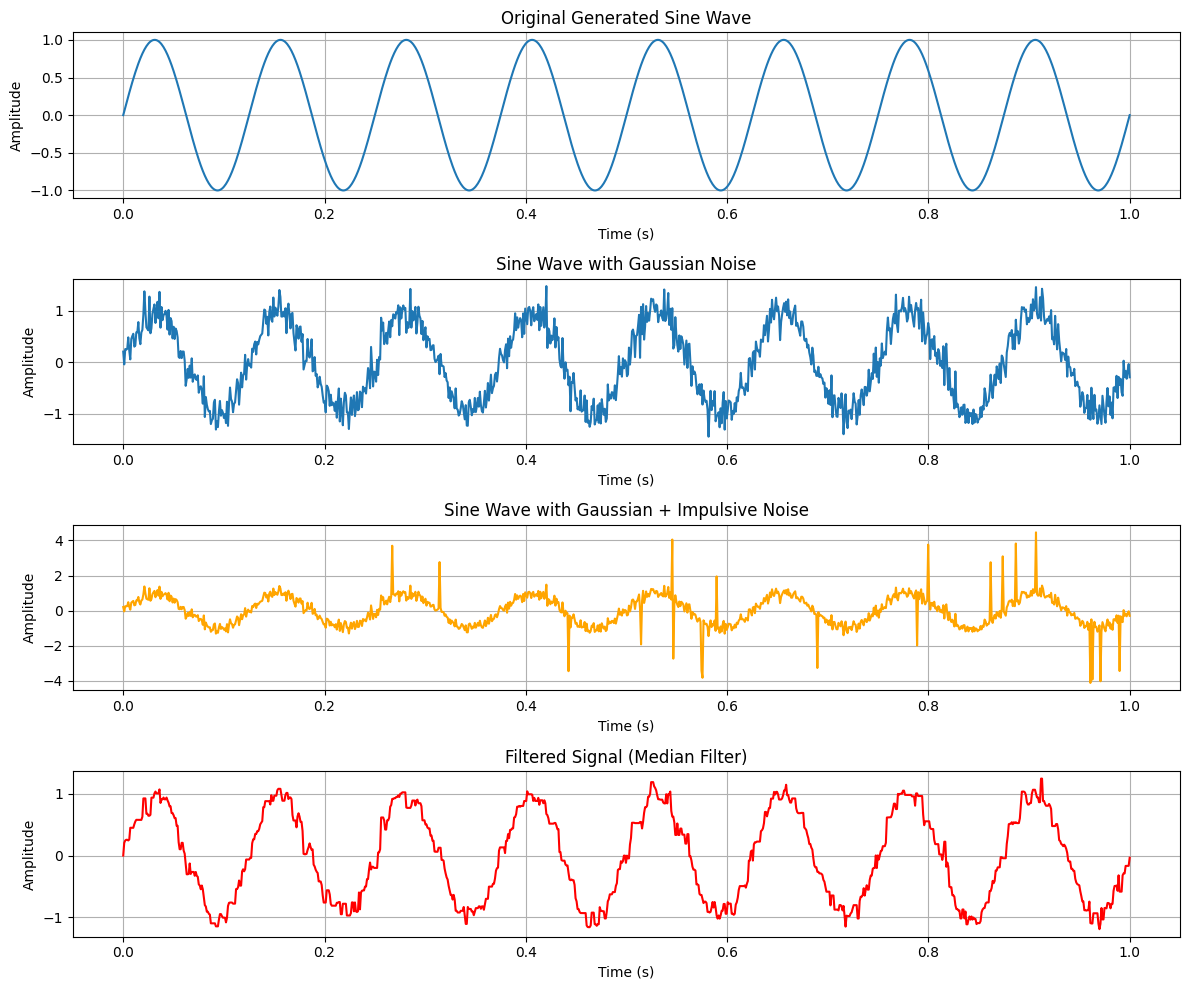

SNR (Noisy Signal with Impulsive Noise)   : 3.350516662613919 dB


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

#--------------------
# first written code
#--------------------

# Generate sine wave
t = np.linspace(0, 1, 1000)   # 1 second, 1000 samples
f = 8  # Frequency of sine wave (Hz)
x = np.sin(2 * np.pi * f * t)
sine_wave = x

# Add Gaussian noise
noise = 0.20 * np.random.randn(len(t))   # Gaussian noise
noisy_signal = sine_wave + noise

# Add impulsive noise
num_spikes = 20  # Number of impulsive noise spikes
impulse_amplitude = 3  # Amplitude of spikes (much larger than noise)

# Random indices to place impulses
spike_indices = np.random.choice(len(t), num_spikes, replace=False)
impulsive_noise = np.zeros(len(t))
impulsive_noise[spike_indices] = impulse_amplitude * np.random.choice([-1, 1], num_spikes)

# Add impulsive noise to noisy signal
noisy_signal_with_impulse = noisy_signal + impulsive_noise

# Filter noisy signal with median filter
filtered_signal = medfilt(noisy_signal_with_impulse, kernel_size=5)

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(4,1,1)
plt.plot(t, sine_wave)
plt.title("Original Generated Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(t, noisy_signal)
plt.title("Sine Wave with Gaussian Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(t, noisy_signal_with_impulse, color='orange')
plt.title("Sine Wave with Gaussian + Impulsive Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(t, filtered_signal, color="red")
plt.title("Filtered Signal (Median Filter)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

# Function to compute SNR
def snr(original, compared):
    noise = compared - original
    signal_power = np.mean(original ** 2)
    noise_power = np.mean(noise ** 2)
    return 10 * np.log10(signal_power / noise_power)

# Compute and print SNRs
snr_noisy = snr(sine_wave, noisy_signal_with_impulse)
snr_filtered = snr(sine_wave, filtered_signal)

print("SNR (Noisy Signal with Impulsive Noise)   :", snr_noisy, "dB")




#--------------------
# later written code
#--------------------



# t=np.arange(0,1,0.001)
# f=8
# x=np.sin(2 * np.pi * f * t)

# plt.figure(figsize=(12, 8))

# plt.subplot(5,1,1)
# plt.plot(t,x)
# plt.title("Original Generated Sine Wave")
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")
# plt.grid(True)

# noise = 0.05 * np.random.randn(len(t))   # Gaussian noise
# noisy_signal = x + noise


# plt.subplot(5,1,2)
# plt.plot(t, noisy_signal, color='r')
# plt.title("Noisy Sine Wave (with Gaussian noise)")
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")
# plt.grid(True)


# filtered_signal = medfilt(noisy_signal, kernel_size=7)

# plt.subplot(5,1,3)
# plt.plot(t, filtered_signal, color="green")
# plt.title("Median Filtered Signal (Gaussian Noise)")
# # plt.legend()
# plt.grid(True)

# noisy_signal2 = np.copy(x)
# num_spikes = 30  # Number of impulses

# # Add random spikes at random positions
# spike_indices = np.random.randint(0, len(t), num_spikes)
# noisy_signal2[spike_indices] += np.random.uniform(-3, 3, num_spikes)

# plt.subplot(5,1,4)
# plt.plot(t, noisy_signal2, color="pink")
# plt.title("Noisy Sine Wave (with impulsive noise)")
# # plt.legend()
# plt.grid(True)

# filtered_signal2 = medfilt(noisy_signal2, kernel_size=7)


# plt.subplot(5,1,5)
# plt.plot(t, filtered_signal2, color="blue")
# plt.title("Median Filtered Signal (Impulsive Noise)")
# # plt.legend()
# plt.grid(True)





# def snr(original, compared):
#     noise = compared - original
#     signal_power = np.mean(original ** 2)
#     noise_power = np.mean(noise ** 2)
#     return 10 * np.log10(signal_power / noise_power)

# snr_noisy = snr(x, noisy_signal)
# snr_filtered = snr(x, filtered_signal)

# snr_noisy2 = snr(x , noisy_signal2)
# snr_filtered2 = snr(x , filtered_signal2)

# print("SNR (Noisy Signal)   :", snr_noisy, "dB")
# print("SNR (Filtered Signal):", snr_filtered, "dB")

# print("SNR (Noisy Signal2)   :", snr_noisy2, "dB")
# print("SNR (Filtered Signal2):", snr_filtered2, "dB")
